# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [36]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [252]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [43]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns in present data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [47]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

- All columns contain 1,898 observations, confirming no actual null values are present. However, the first few rows reveal that the `rating` column has values labeled "Not given," indicating missing ratings. This suggests that these entries are intentional placeholders and should not be treated as null values, especially considering that Question 5 requests the count of unrated data in the `rating` column, following Question 3 about handling null data.

- `restaurant_name`, `cuisine_type`, and `day_of_the_week` are of `object` data type.

- `order_id`, `customer_id`, `food_preparation_time`, and `delivery_time` are of `int` data type.

- The `rating` column is currently read as `object` due to the "Not given" entries. Since `rating` is a categorical variable, it would ideally be of `int` type. Replacing the placeholder with a numeric indicator would allow for proper categorical handling.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [51]:
# Determine if there is any missing data.
missing_values = df.isnull().sum()
missing_values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There is no null value.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [55]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: The minimum, average, and maximum time it takes for food to be prepared once an order is placed respectively are 20 min., 27.3719 min. and 35 min.


### **Question 5:** How many orders are not rated? [1 mark]

In [295]:
# Write the code here
df['rating'].value_counts()

rating
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64

#### Observations: There are 736 orders which are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [65]:
# Write the code here
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Categorical and numerical data are separated into individual arrays.

In [68]:
cat_col=['order_id','customer_id', 'restaurant_name','cuisine_type','day_of_the_week', 'rating']
num_col=df.drop(columns=cat_col)


#### A function to display a box plot and histogram stacked vertically for visualizing numerical columns.

In [71]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

In [73]:
num_col.columns

Index(['cost_of_the_order', 'food_preparation_time', 'delivery_time'], dtype='object')

##### **Cost of order plots** 

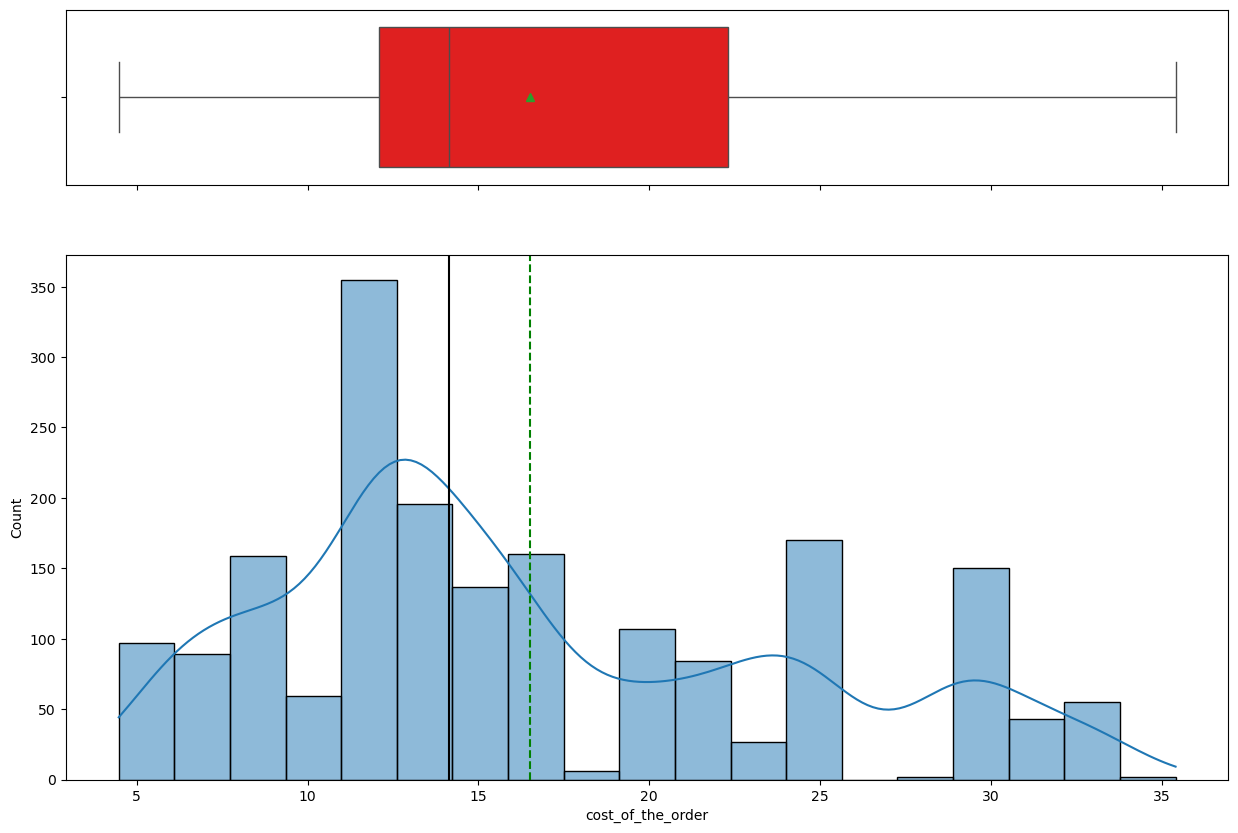

In [76]:
 p = histogram_boxplot(df['cost_of_the_order'])

##### **Observation**: The range of sold food prices is between 4.47 and 35.41 dollars. Orders costing between 12 and 14 dollars had higher sales than others. Additionally, the mode being smaller than the mean confirms a right-skewed distribution, with no outliers present in the data.

##### **Food preparation time plots** 

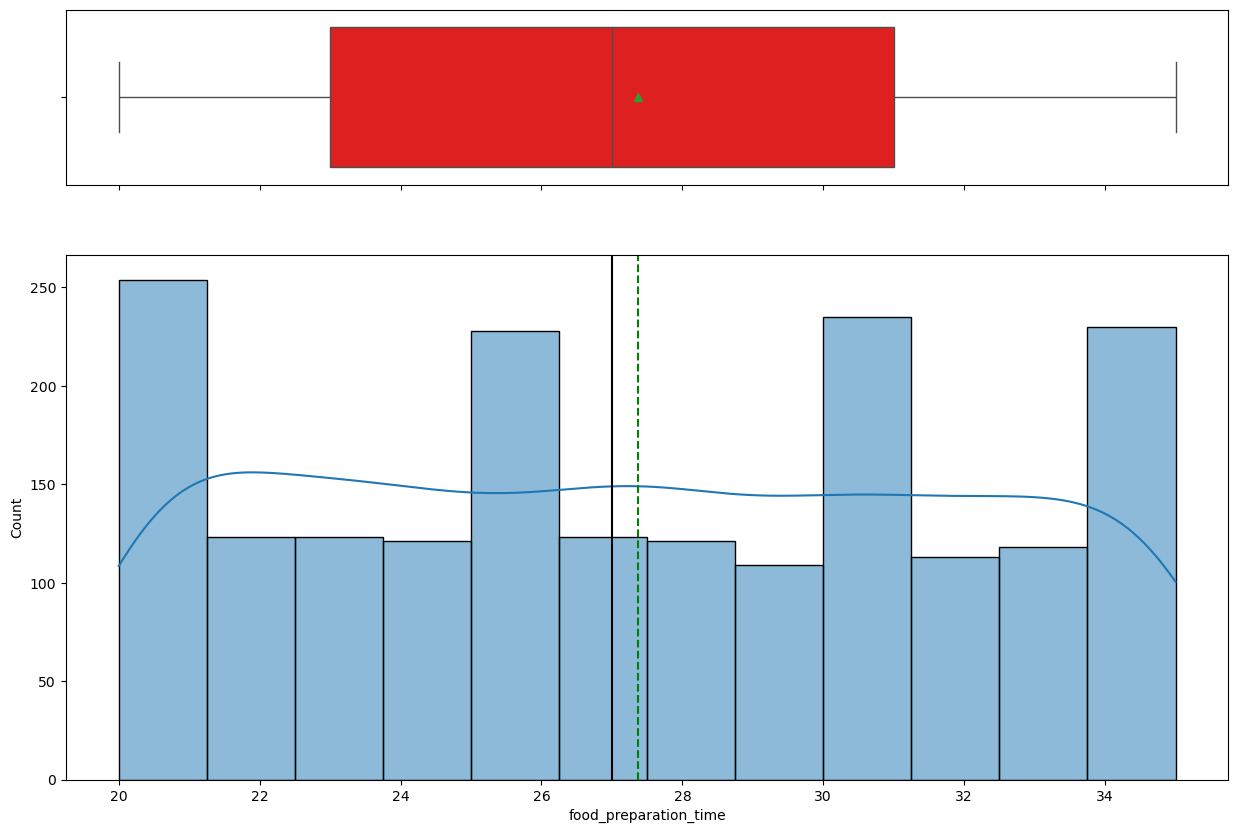

In [80]:
 p = histogram_boxplot(df['food_preparation_time'])


##### **Observation**: The distribution is approximately uniform, ranging from 20 to 35 minutes, with no outliers. About half of the orders are prepared in under 28 minutes.

##### **Delivery time plots** 

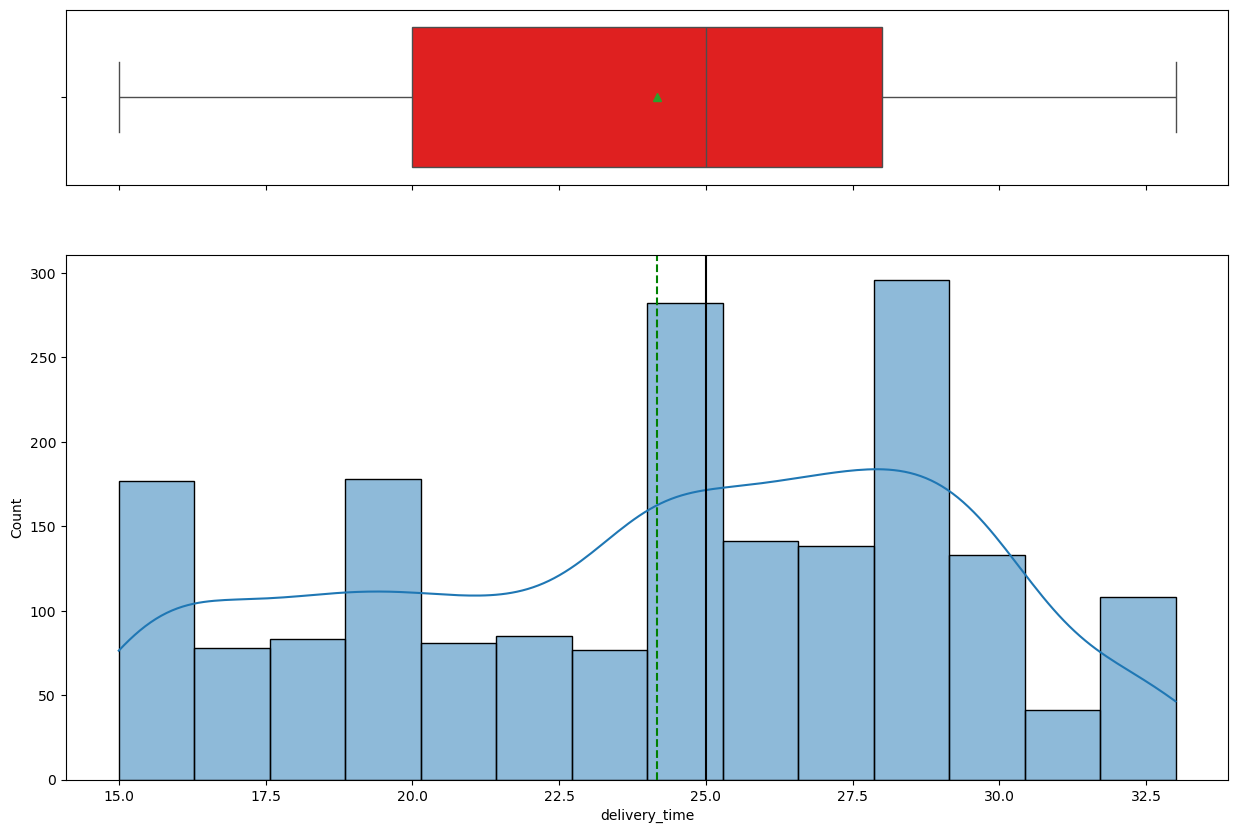

In [84]:
 p = histogram_boxplot(df['delivery_time'])


##### **Observation**: The distribution is a little bit left skewed, ranging from 15 to 33 minutes, with no outliers. 

##### Bar plot function for categorical data was defined

In [88]:
cat_col

['order_id',
 'customer_id',
 'restaurant_name',
 'cuisine_type',
 'day_of_the_week',
 'rating']

In [90]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    
    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()   

##### **Customer id**

/var/folders/6k/7nngqsln42n_txk789s2_x640000gn/T/ipykernel_72963/4126360250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='customer_id', data=df, palette='Paired', order=df['customer_id'].value_counts().iloc[:20].index)


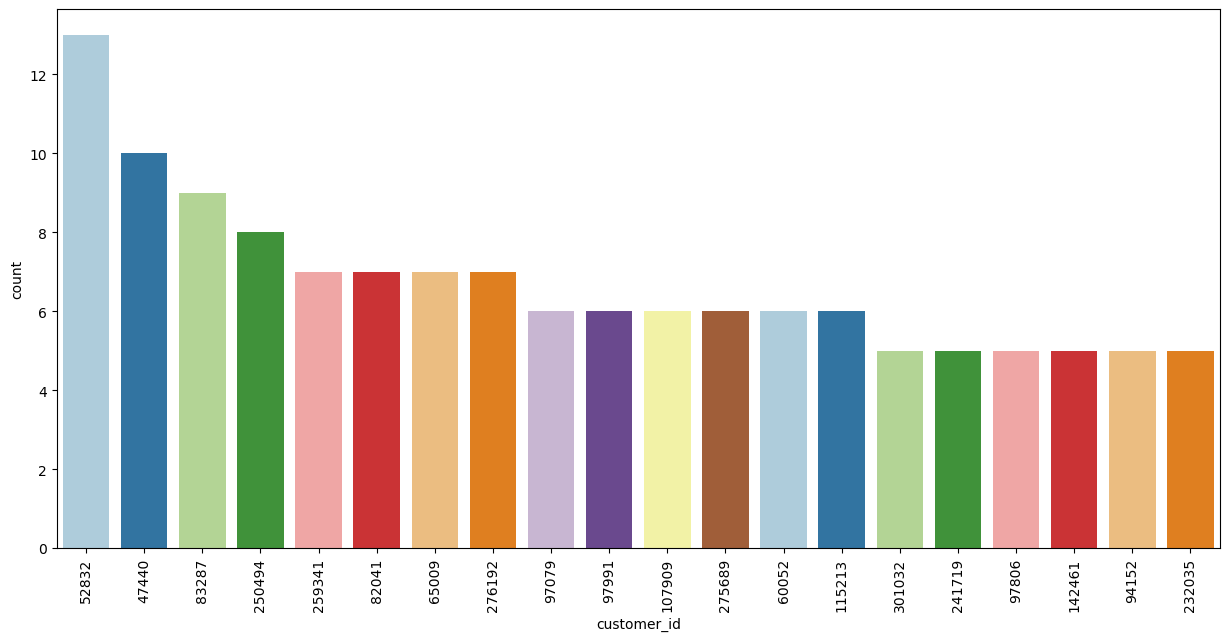

In [222]:
plt.figure(figsize = (15,7))
ax = sns.countplot(x='customer_id', data=df, palette='Paired', order=df['customer_id'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

In [95]:
df['customer_id'].nunique()

1200

In [97]:
df['customer_id'].value_counts().unique()

array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [99]:
100-(8/df['customer_id'].shape[0]*100)

99.57850368809272

##### **Observation**: There are a total of 1,200 customers, with order counts ranging from 1 to 13. There is no outlier in data. Customer id 52832 has the top order numbers.99.5% of customers ordered less than 6 times.

##### **Restaurant name**

/var/folders/6k/7nngqsln42n_txk789s2_x640000gn/T/ipykernel_72963/1442966494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='restaurant_name', data=df, palette='Paired', order=df['restaurant_name'].value_counts().iloc[:10].index)


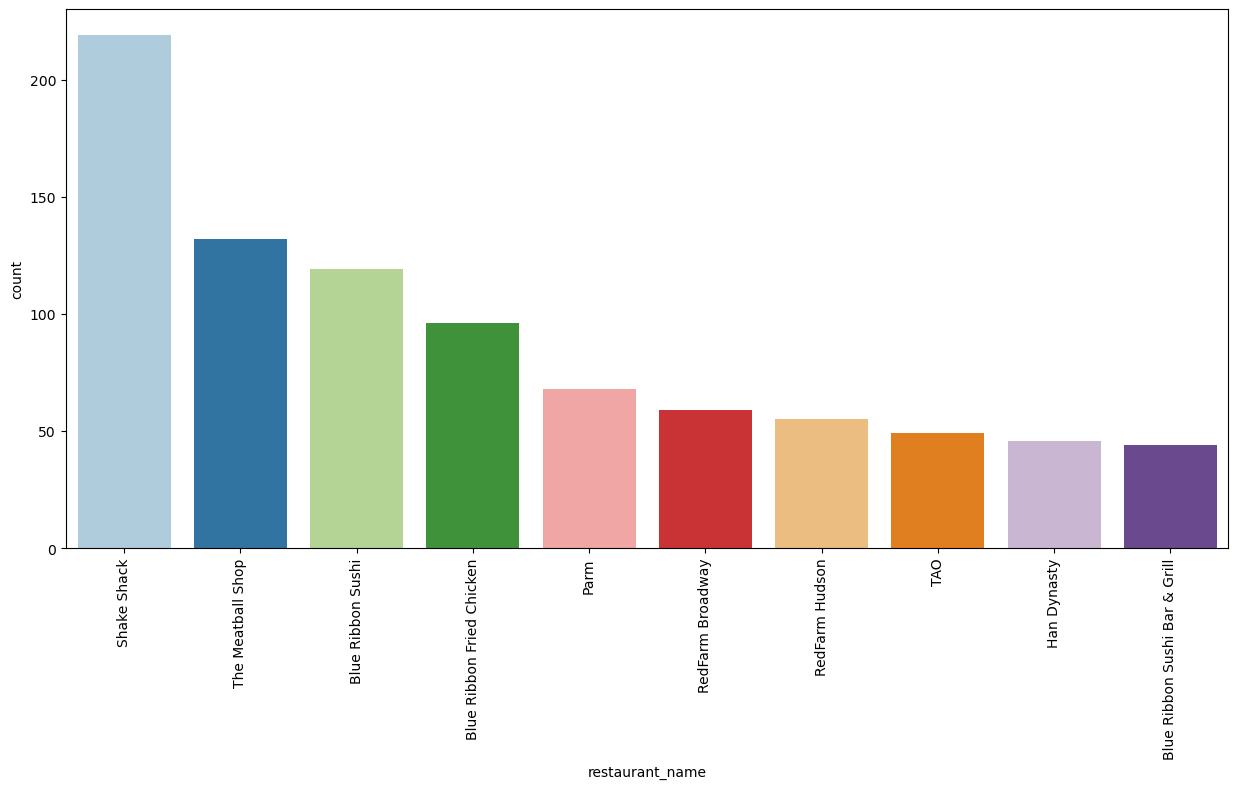

In [220]:
plt.figure(figsize = (15,7))

ax = sns.countplot(x='restaurant_name', data=df, palette='Paired', order=df['restaurant_name'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

plt.show()

##### **Observation** To be able to have a better view just ten top data of restaurant name were chosen for Bar plot. As it is obvious shake Shack, The meatball shop and Blue Ribbon suchi have the most sale respectively.

##### **Cuisine type**

/var/folders/6k/7nngqsln42n_txk789s2_x640000gn/T/ipykernel_72963/2960953575.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


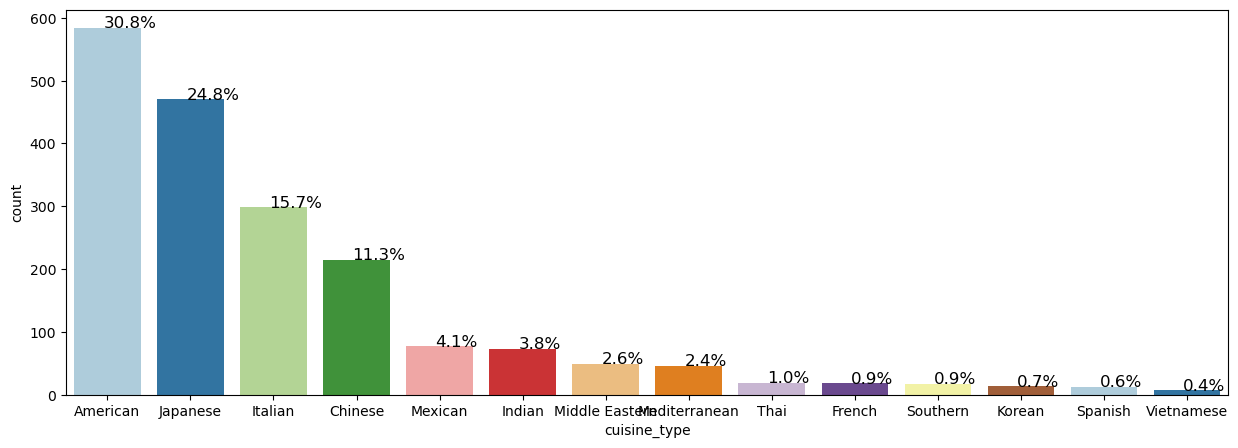

In [107]:
bar_perc(df,'cuisine_type')


##### **Observation** American, Japanese, Italian, and Chinese cuisines are the most popular, accounting for 82% of all orders combined.

##### **Day of the week**

/var/folders/6k/7nngqsln42n_txk789s2_x640000gn/T/ipykernel_72963/2960953575.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


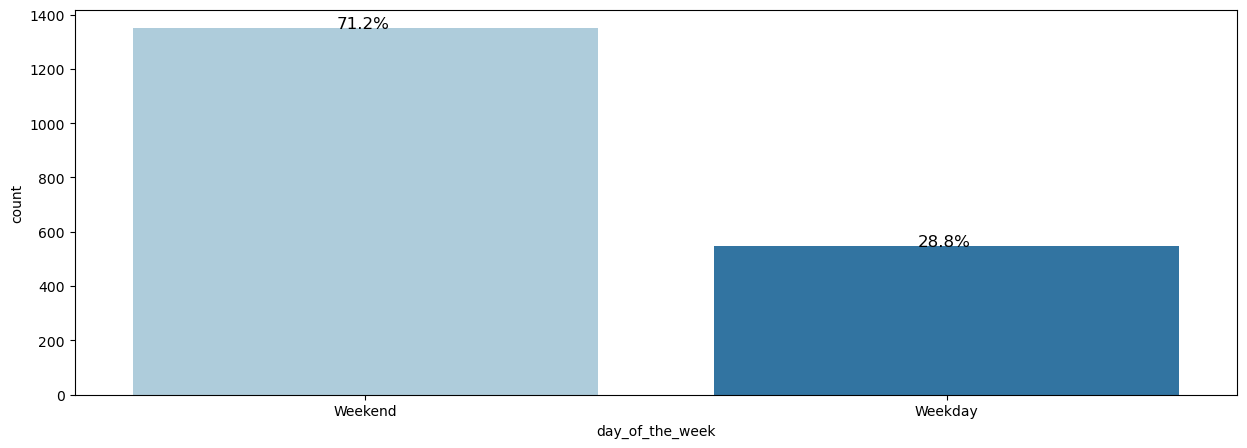

In [111]:
bar_perc(df,'day_of_the_week')

##### **Observation**  71.2% of the orders belong to the weekend.

##### **Day of the week**

/var/folders/6k/7nngqsln42n_txk789s2_x640000gn/T/ipykernel_72963/2960953575.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


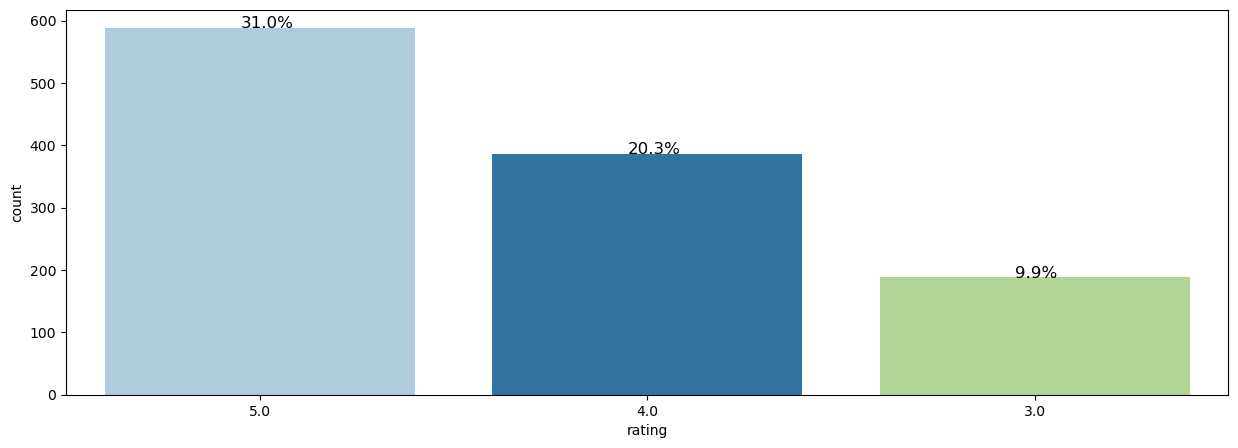

In [214]:
bar_perc(df,'rating')

##### **Observation**: Overall, no one has been dissatisfied. Although the number of those who did not vote is high.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [119]:
# Write the code here
df['restaurant_name'].value_counts().iloc[:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [121]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Observations: Top 5 restaurants in terms of the number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [125]:

#A=df.loc[df['day_of_the_week']=='Weekend']
#A['cuisine_type'].value_counts()

df.loc[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts(normalize=True)

cuisine_type
American          0.307180
Japanese          0.247964
Italian           0.153220
Chinese           0.120651
Mexican           0.039230
Indian            0.036269
Mediterranean     0.023686
Middle Eastern    0.023686
Thai              0.011103
French            0.009623
Korean            0.008142
Southern          0.008142
Spanish           0.008142
Vietnamese        0.002961
Name: proportion, dtype: float64

#### Observations:American cuisine is the most popular, making up 30% of total sales.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [129]:
# Write the code here
A=df[df['cost_of_the_order']>20]
A.shape[0]/df.shape[0]*100

29.24130663856691

#### Observations: Almost near 30% of the orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [133]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:The mean order delivery time is 24.16 mins.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [137]:
# Write the code here
Top_three_customers=df['customer_id'].value_counts().iloc[:3]
Top_three_customers.reset_index()


,customer_id,count
0,52832,13
1,47440,10
2,83287,9


#### Observations: Top 3 most frequent customer-ids are 52832, 47440 and 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### To be able to check correlation of all data, two changes needed to be done.First the 'Not given' data in rating column just has been changed to null data. Also the day of the week column data were encoded to numbers 1 and 0 for Weekend and Week day. 

In [254]:
df['rating'] = df['rating'].replace(['Not given'],np.nan)
df['rating'] = df['rating'].astype(float)
df['rating']

0       NaN
1       NaN
2       5.0
3       3.0
4       4.0
       ... 
1893    5.0
1894    5.0
1895    NaN
1896    5.0
1897    NaN
Name: rating, Length: 1898, dtype: float64

In [256]:
df['day_of_the_week']

0       Weekend
1       Weekend
2       Weekday
3       Weekend
4       Weekday
         ...   
1893    Weekend
1894    Weekend
1895    Weekday
1896    Weekday
1897    Weekend
Name: day_of_the_week, Length: 1898, dtype: object

In [258]:
df['day_of_the_week'] [df['day_of_the_week'] =='Weekend']  = 1
df['day_of_the_week'] [df['day_of_the_week'] =='Weekday']  = 0
df['day_of_the_week'] = df['day_of_the_week'].astype(int)
df.head()

/var/folders/6k/7nngqsln42n_txk789s2_x640000gn/T/ipykernel_72963/332376489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_the_week'] [df['day_of_the_week'] =='Weekend']  = 1
/var/folders/6k/7nngqsln42n_txk789s2_x640000gn/T/ipykernel_72963/332376489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_the_week'] [df['day_of_the_week'] =='Weekday']  = 0


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,1,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,1,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,0,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,1,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,0,4.0,25,24


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   int64  
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 133.6+ KB


#### The correlation between data features could be seen in following plot.

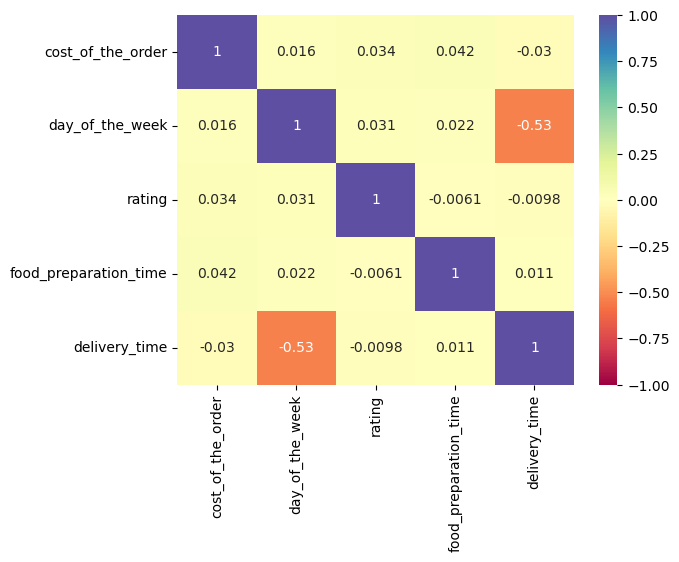

In [262]:
# Write the code here
# Check for correlation among variables
dfcorr=pd.DataFrame(df[['cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']])
dfcorr
sns.heatmap(dfcorr.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

##### **Observation**  A negative correlation of -0.5 exists between the day of the week and delivery time. No other notable correlations are observed between other features.

To gain more insight into the correlation between the day of the week and delivery time, the following two plots are created.

<Figure size 1500x700 with 0 Axes>

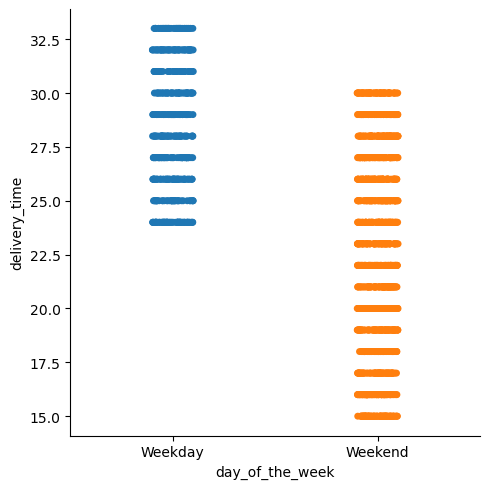

In [1008]:
plt.figure(figsize = (15,7))

sns.catplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week');


<Figure size 1500x700 with 0 Axes>

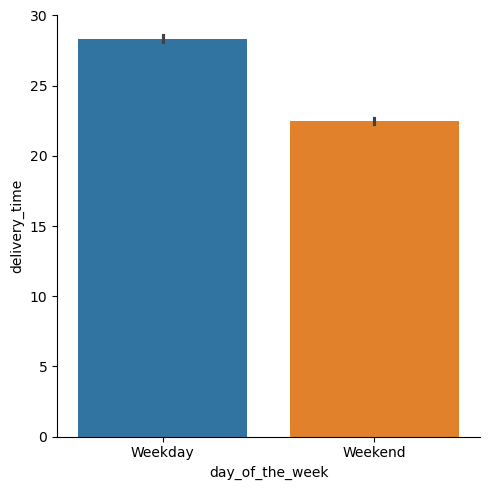

In [1006]:
plt.figure(figsize = (15,7))

sns.catplot(data=df, x='day_of_the_week',  y='delivery_time',hue='day_of_the_week', kind='bar')

<Figure size 1500x700 with 0 Axes>

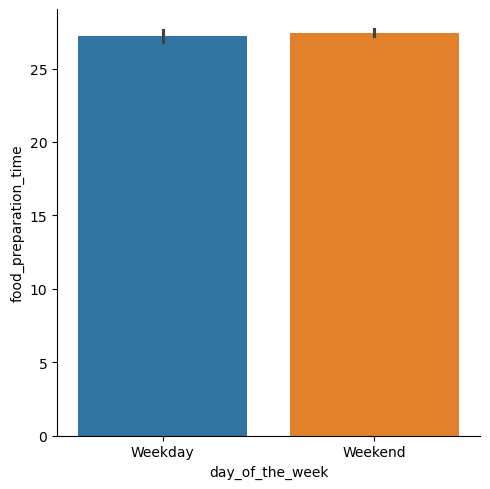

In [152]:
plt.figure(figsize = (15,7))

sns.catplot(data=df, x='day_of_the_week',  y='food_preparation_time',hue='day_of_the_week', kind='bar')


**Observation** On weekdays, delivery times are longer with a narrower range of 23 to 33 minutes. In contrast, weekends have a wider delivery time range, spanning from 15 to 30 minutes. This could be due to weekday traffic increasing delivery time or a higher number of delivery staff available on weekends. The preparation time for food is almost the same.

<Figure size 1500x700 with 0 Axes>

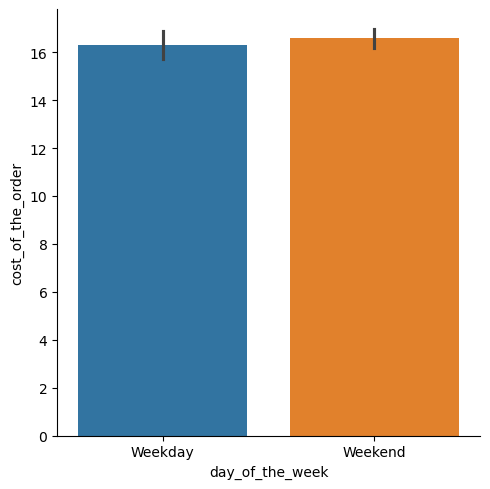

In [155]:
plt.figure(figsize = (15,7))

sns.catplot(data=df, x='day_of_the_week',  y='cost_of_the_order',hue='day_of_the_week', kind='bar')


##### **Observation** Sales over the weekend almost match the sales throughout the entire week.

In [158]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

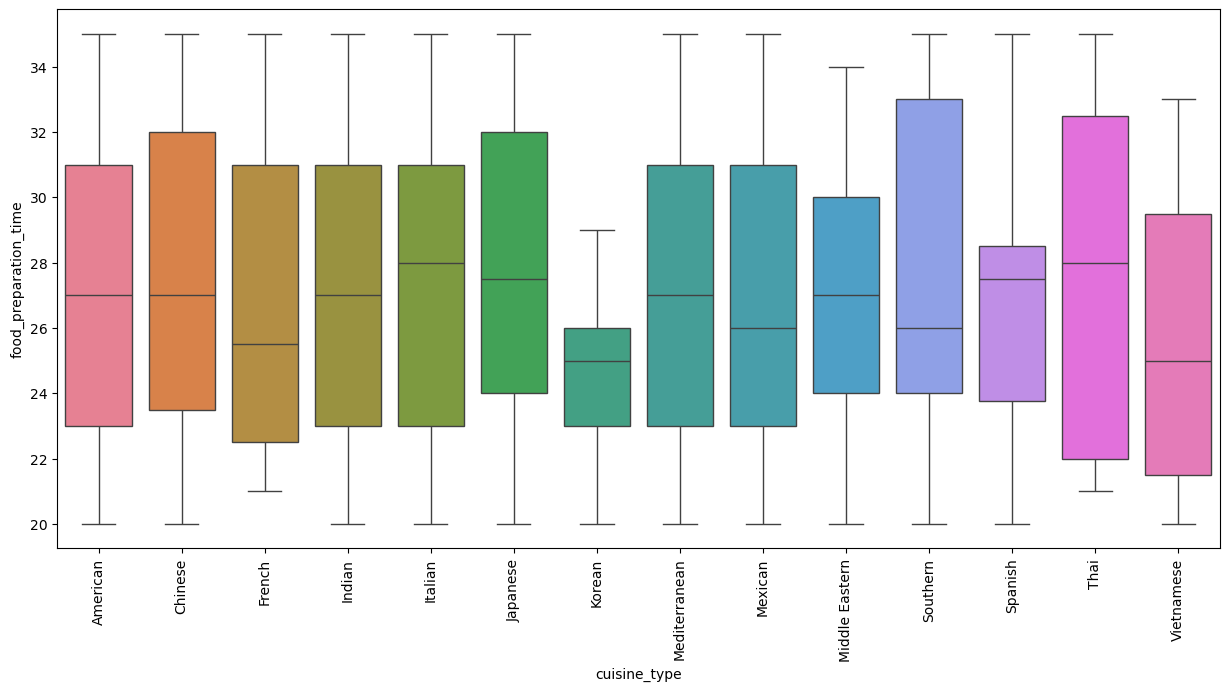

In [160]:
plt.figure(figsize = (15,7))

sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time',hue='cuisine_type',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

##### **Observation**:Korean food has the shortest preparation time, while other cuisines have similar preparation times.

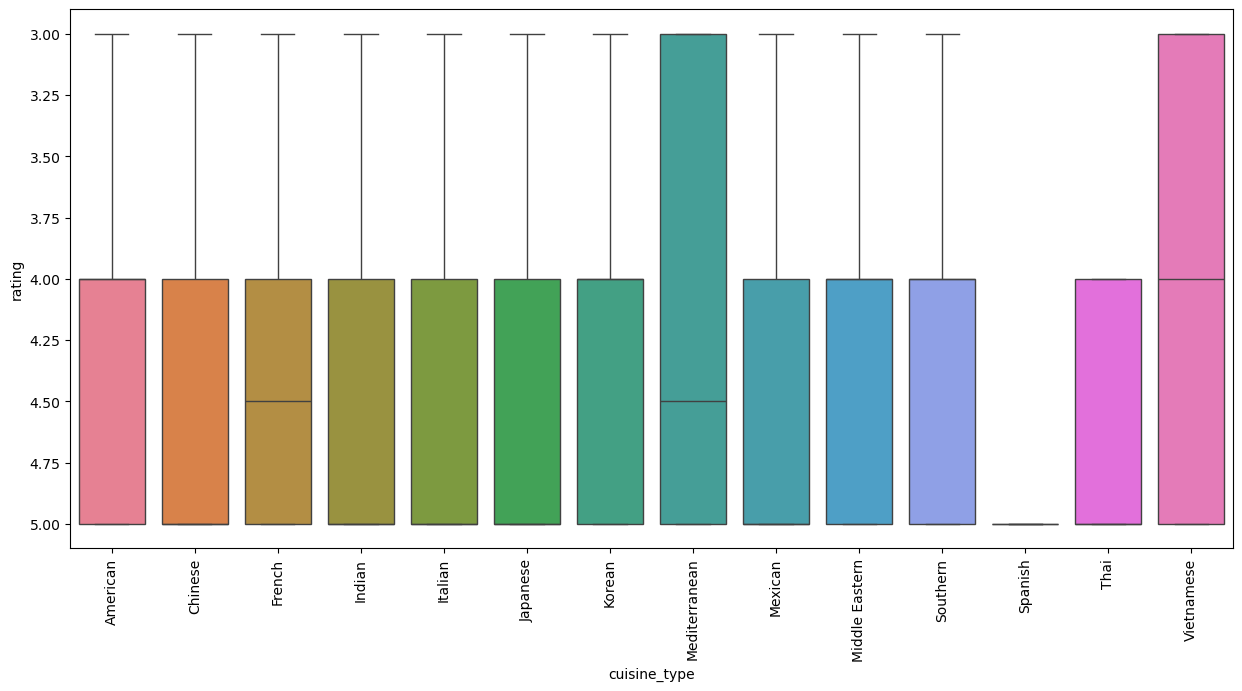

In [237]:
plt.figure(figsize = (15,7))

sns.boxplot(data=df,x='cuisine_type',y='rating',hue='cuisine_type',showfliers=False) # turning off outliers

plt.xticks(rotation=90);

##### **Observation**: All cuisine types have ratings higher than three, except for Thai and Spanish cuisines, which received ratings of four or above and five. No cuisine received a rating lower than three. It is obvious that the rating doesnt effect the rate of selling.

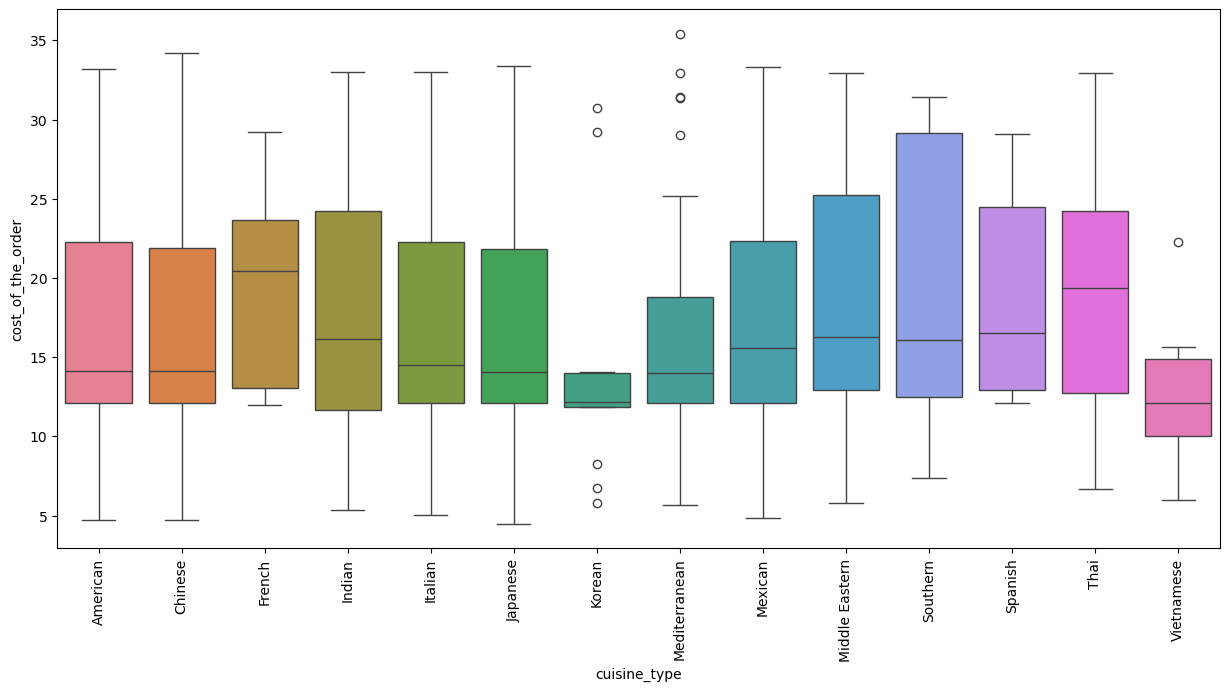

In [179]:
plt.figure(figsize = (15,7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order',hue='cuisine_type');
plt.xticks(rotation=90);

##### **Observation** : Vietnamese cuisine has the lowest prices overall, with the exception of one outlier. The highest order cost comes from Mediterranean cuisine, while Korean cuisine has a few outliers on both ends of the price spectrum.

<Axes: xlabel='cuisine_type', ylabel='count'>

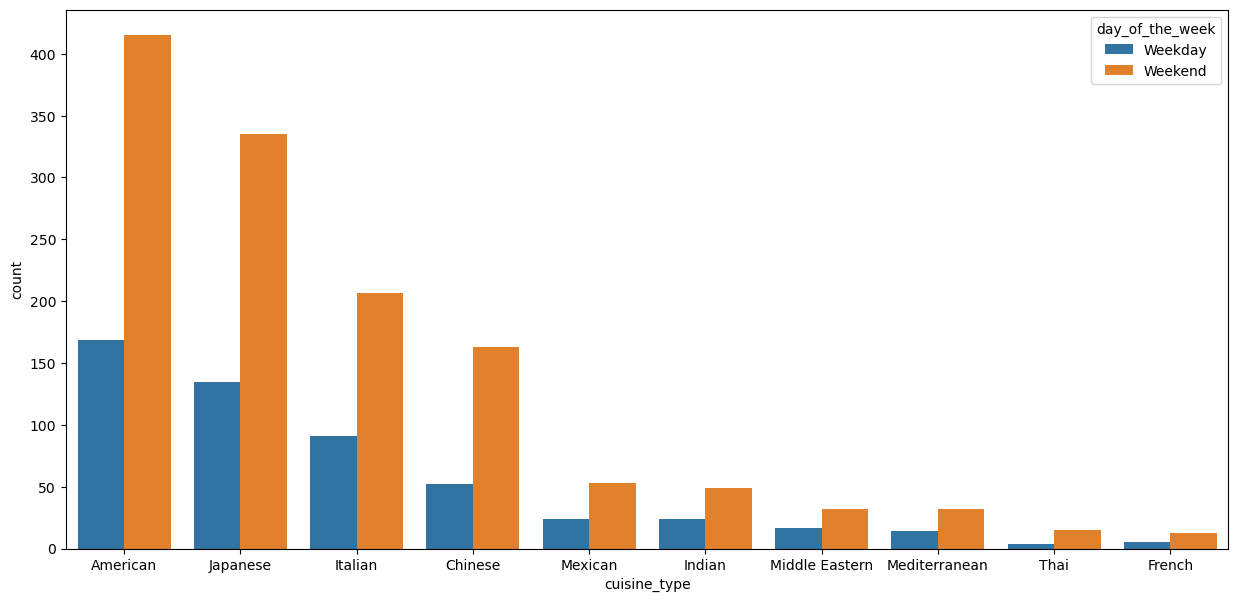

In [169]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week', order = df.cuisine_type.value_counts().iloc[:10].index)

**Observation** Increased sales during the weekend are observed across all cuisines.

**Because there are too many unique data for resteaurant name just top eight best seller are selected to be shown in the plots**

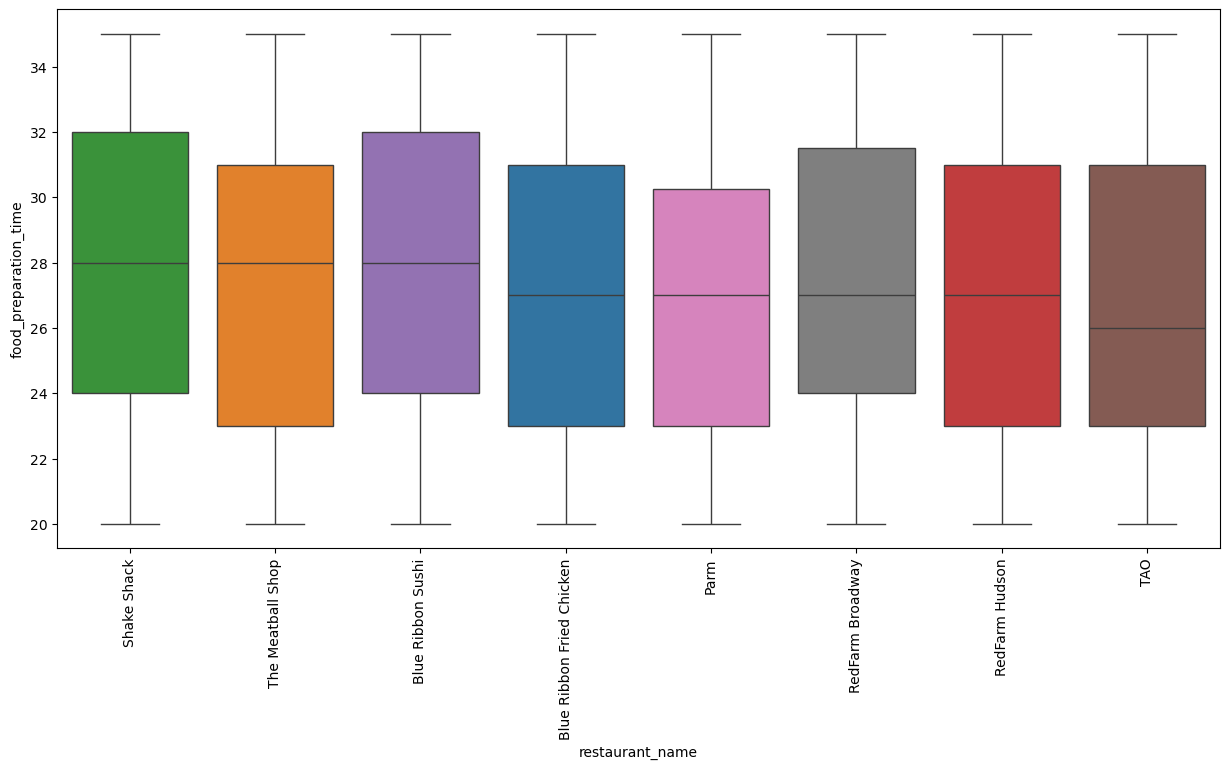

In [209]:

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_top_10, x='restaurant_name', y='food_preparation_time', hue='restaurant_name',order = df.restaurant_name.value_counts().iloc[:8].index, showfliers=False)
plt.xticks(rotation=90)

plt.show()

##### **Observation**: Cooking times are relatively consistent across different restaurants.

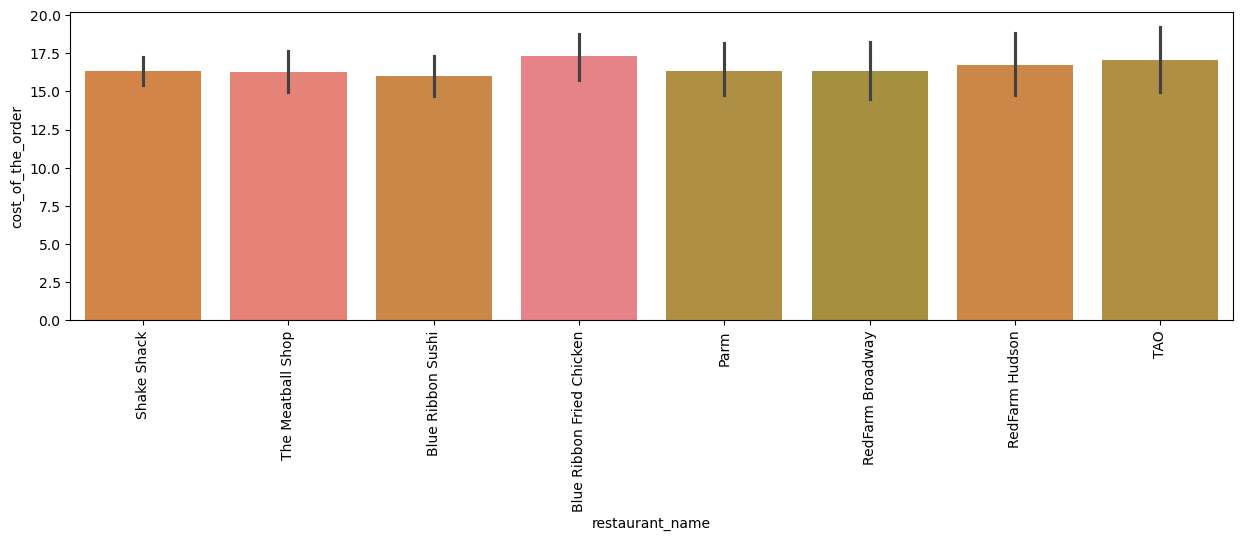

In [212]:
plt.figure(figsize = (15,4))
sns.barplot(data = df, x = 'restaurant_name', y = 'cost_of_the_order', hue='restaurant_name', order = df.restaurant_name.value_counts().iloc[:8].index)
plt.xticks(rotation=90)
plt.show()


##### **Observation**:Revenue from the ten restaurants with the highest meal sales.

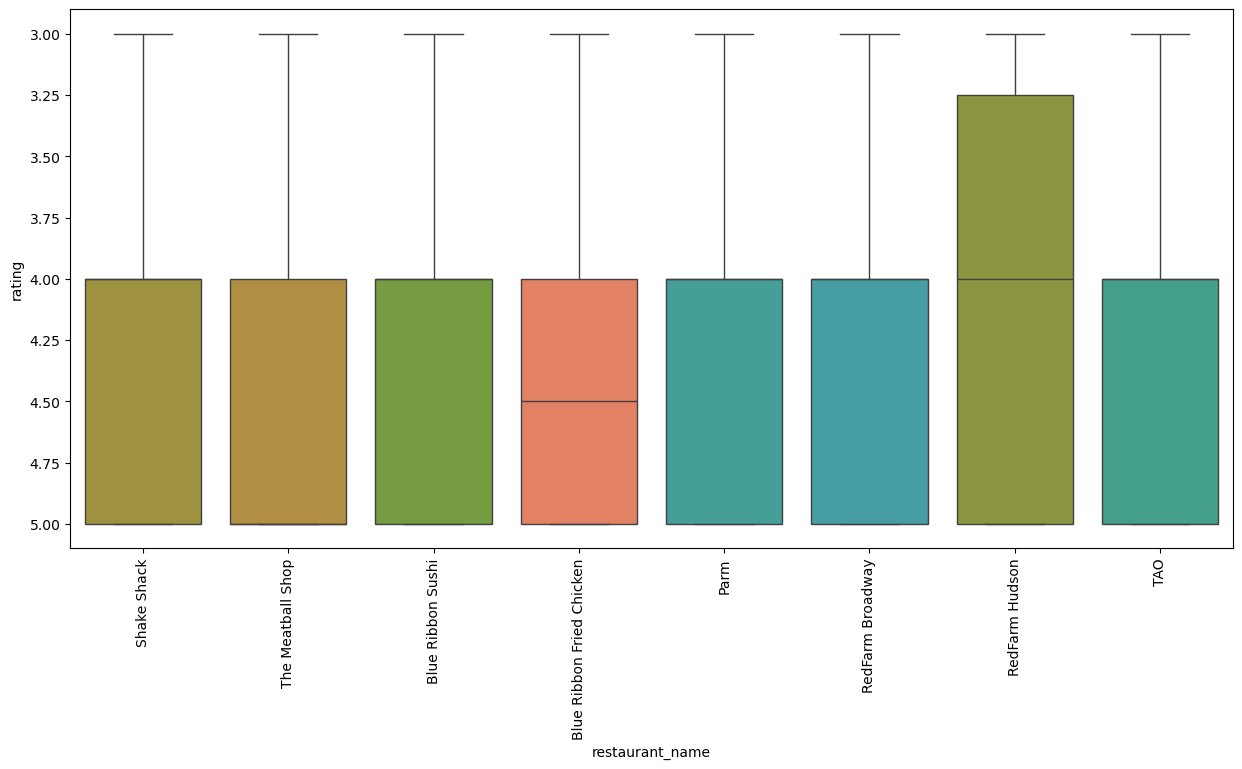

In [246]:

# Get the top 10 restaurant names by frequency
top_20_restaurants = df['restaurant_name'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 10 restaurants
df_top_20 = df[df['restaurant_name'].isin(top_20_restaurants)]

# Plot
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_top_20, x='restaurant_name', y='rating', hue='restaurant_name', order = df.restaurant_name.value_counts().iloc[:8].index)
plt.xticks(rotation=90)

plt.show()

#### **Observation**: They all have same range of rating.

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

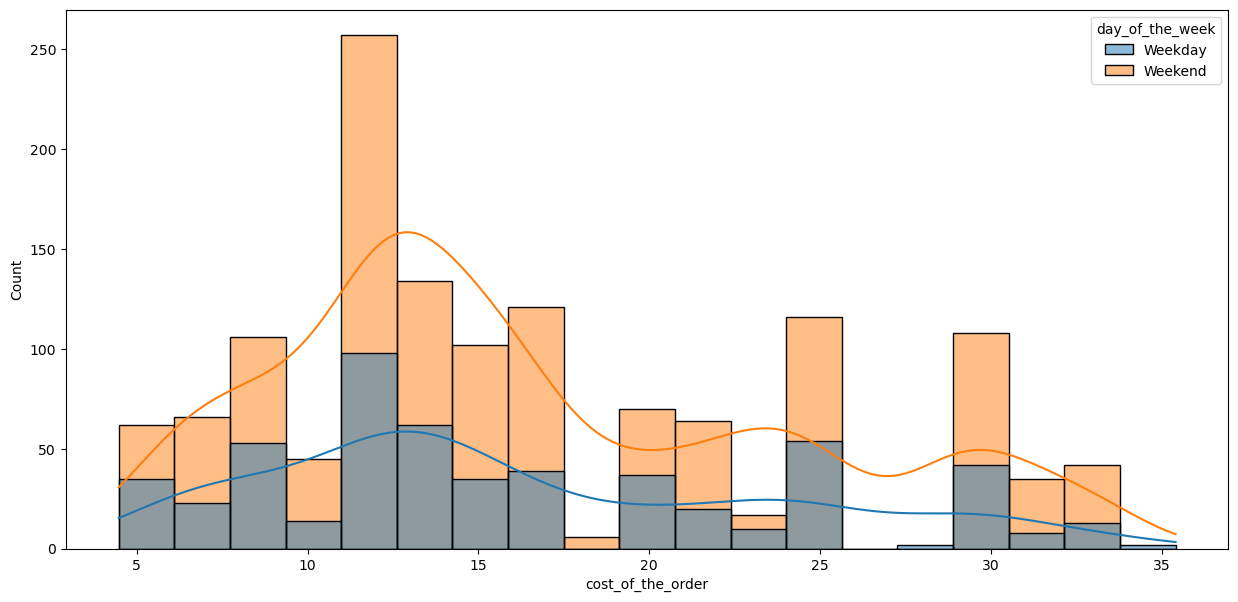

In [177]:
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'day_of_the_week', kde = True)


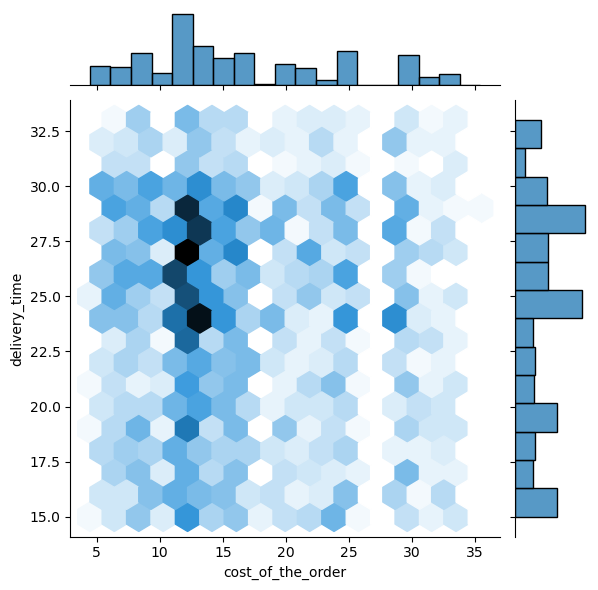

In [272]:
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'delivery_time', kind = 'hex')


**Observation**: Order costs are concentrated around $11, with delivery times ranging mostly between 24 and 30 minutes.

In [278]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

<Figure size 1500x700 with 0 Axes>

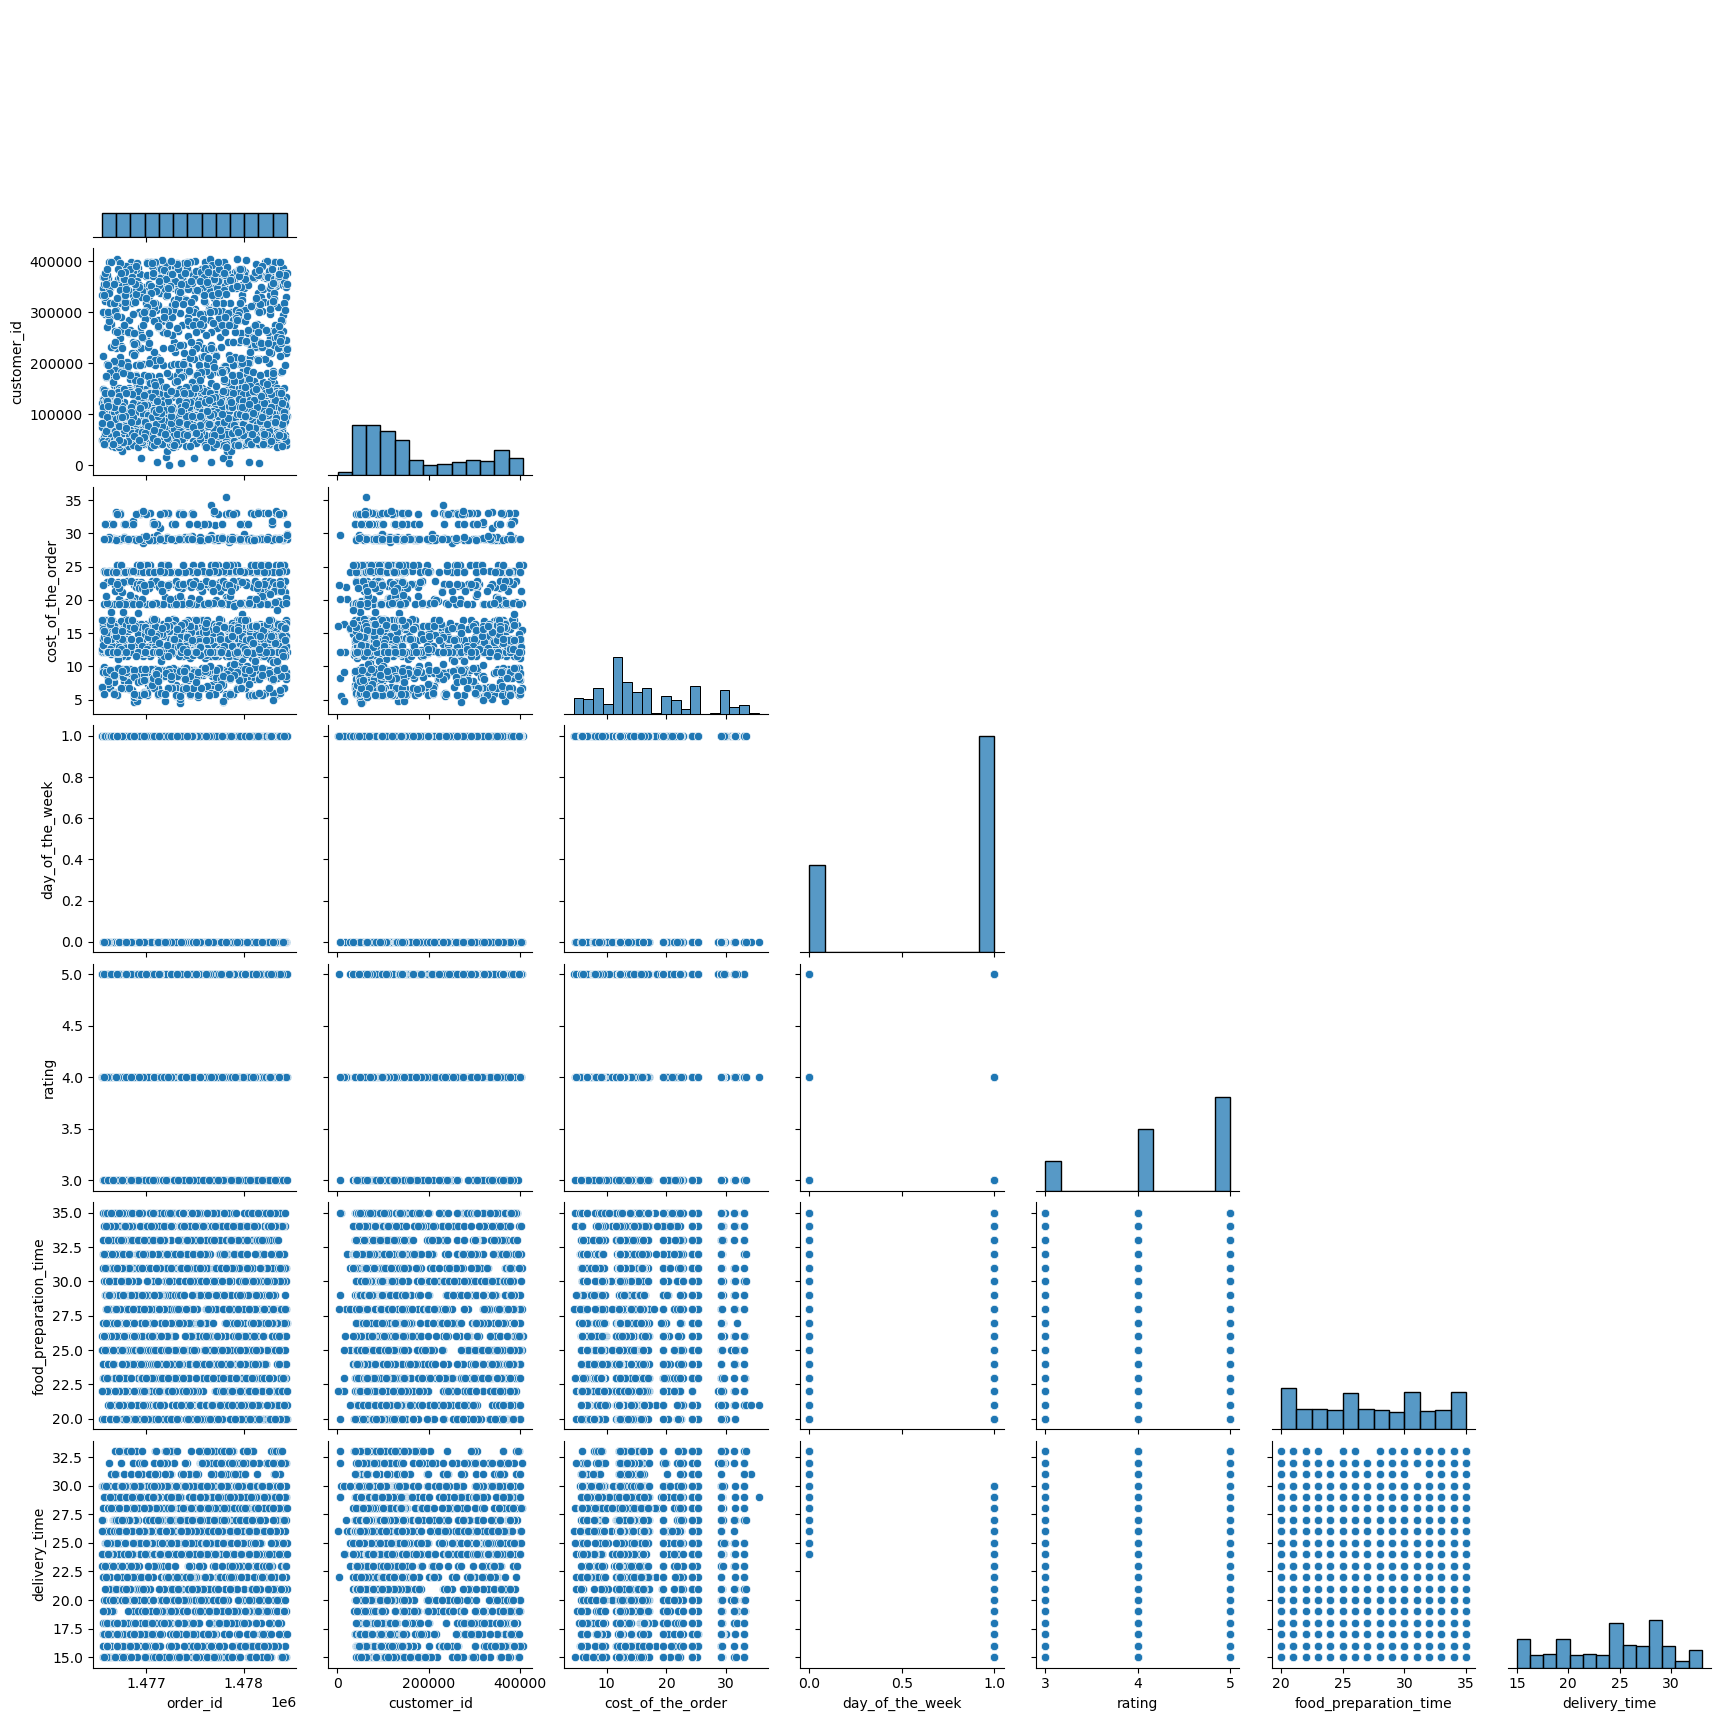

In [280]:
plt.figure(figsize=(15, 7))

sns.pairplot(data=df,corner=True);


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [809]:
# Write the code here
#df(['rating'],['restaurant_name']).value_counts()
A=df.groupby('restaurant_name')['rating'].agg(['mean','count'])
B=A[(A['mean']>4) & (A['count']>50)]
B

,mean,count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


#### Observations:Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop all meet the promotion offer requirements.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [866]:

# Filter orders with cost greater than 20 and calculate income
A = df[df['cost_of_the_order'] > 20]
A_income = (A['cost_of_the_order'] * 0.25).sum()

# Filter orders with cost between 5 and 20 and calculate income
B = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20)]
B_income = (B['cost_of_the_order'] * 0.15).sum()

# Calculate total income
total_income = A_income + B_income
total_income


6166.303

#### Observations:  The net revenue generated by the company across all orders is 6166.30 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [868]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [298]:
# Write the code here
df['Total_time']=df['food_preparation_time']+df['delivery_time']
df['Total_time'][df['Total_time']>60].count()/df.shape[0]*100

10.537407797681771

#### Observations:10.54% orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [302]:
# Write the code here
#df.groupby(['delivery_time'])['day_of_the_week'].mean()
df.groupby('day_of_the_week')['delivery_time'].mean()


day_of_the_week
0    28.340037
1    22.470022
Name: delivery_time, dtype: float64

#### Observations:The average delivery time for orders is  28.3% on weekdays and 22.5% on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

#### **Conclusions**: 
* Most orders cost between 12-22 dollars.
- American cuisine is the most popular, while Vietnamese is the least ordered.
- 38% of orders lack ratings. Spanish cuisine has the highest ratings, but the top five most-ordered cuisines don't necessarily have the best ratings.
- There are more orders on weekends than weekdays. While preparation times remain consistent, delivery times are generally longer on weekdays, increasing the total order time. That is Likely due to weekday traffic patterns. Delivery time patterns remain similar across restaurants.
- Vietnamese cuisine has the lowest average cost and rating, along with one of the highest total order times and the fewest orders.
- The top four most-ordered cuisines are American, Japanese, Italian, and Chinese, while Vietnamese is the least popular.
- The highest-rated cuisines are Spanish, Thai, and Indian, while Vietnamese has the lowest rating.
- The most popular restaurants are Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.
- Most customers order only once or twice, indicating limited loyalty.
- Customers generally avoid large or high-cost orders through the app.
- Customer satisfaction is high, with no ratings below three stars, although the number of unrated orders is significant.
- Food preparation times range between 20 and 35 minutes, which is relatively long, with an average delivery time around 24 minutes and no outliers.
- American restaurants earn the most revenue, followed by Japanese and Italian, with Vietnamese restaurants earning the least.
- Correlations among rating, preparation time, delivery time, and order cost are minimal.

*  

#### **Recommendations**:



1. **Encourage Customer Ratings:**
   - With 38% of orders lacking ratings, incentives such as discounts on rated orders or a free item on the tenth rating could encourage customer feedback. Separate ratings for food and delivery could also help FoodHub identify specific areas for improvement, helping differentiate issues with food quality from delivery service.

2. **Evaluate Vietnamese Cuisine:**
   - Vietnamese cuisine has the lowest ratings, fewest orders, and one of the highest total delivery times. Although it's among the cheaper options, it appears less appealing. Focusing instead on cuisines with higher demand and ratings may be more beneficial.

3. **Boost Weekday Sales with Promotions:**
   - A weekday promotion, such as discounts or free delivery on orders above a certain amount, could help drive orders on less busy days.

4. **Optimize Delivery Times on Weekdays:**
   - Longer delivery times during weekdays could be due to traffic or driver availability. Adding more delivery personnel and assigning specific regions could reduce delays. An incentive for fast deliveries, like bonuses for drivers who deliver within 20 minutes, may also improve delivery efficiency.

5. **Increase Popular Cuisine Offerings:**
   - Engaging more restaurants offering American, Japanese, Italian, Chinese, and Mexican cuisine would align with customer demand. Conversely, FoodHub could consider reducing options for less popular cuisines, such as Vietnamese, French, Spanish, Korean, and Thai.

6. **Enhance Loyalty Programs:**
   - Most customers order only once or twice, indicating limited loyalty. A rewards program offering points based on order frequency or value could help retain customers. Accumulated points could be redeemed for discounts or freebies.

7. **Promote High-Value Orders:**
   - Customers tend to place smaller orders (maxing out around $35). Focusing promotions on popular restaurants like Shake Shack, The Meatball Shop, and Blue Ribbon Sushi could encourage larger orders, potentially increasing revenue.

8. **Improve Restaurant Preparation Times:**
   - Faster food preparation can enhance customer satisfaction and order frequency. Restaurants with quicker prep times and higher ratings could receive lower service charges as an incentive.

9. **Promote Lesser-Ordered Cuisines:**
   - Offering discounts or introductory offers could attract more customers to try lesser-ordered cuisines like Vietnamese, Thai, and Spanish, potentially balancing demand across a wider variety of options.

10. **Understand Infrequent Customers:**
    - For customers who have ordered fewer than three times, consider gathering feedback to identify barriers to frequent use. Offering incentives for feedback or simplified post-order surveys can help address customer concerns.

11. **Increase Revenue from Frequent Customers:**
    - Encourage frequent customers to spend more by adding a "Recommended Extras" list at the checkout, including popular add-ons or customer testimonials to entice additional purchases.

12. **Address Variability in Restaurant Performance:**
    - FoodHub should collect more feedback or data to understand reasons for low sales or ratings at certain restaurants. Reasons may include food quality, niche cuisine appeal, or packaging quality. Conducting a cost-benefit analysis on underperforming options and possibly using ads for newly added restaurants could improve visibility and performance.



---